In [2]:
collection = "tweets_hayotrocamino"

In [1]:
import pandas as pd

%matplotlib inline

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 999)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Modifique el path de acceso.
tweets = pd.read_csv(r'C:\Users\causa\Desktop\Data Science\Data Science Projects\Sentiment Analysis-Celayes\tweets_hayotrocamino_tweets.csv' )

In [51]:
# Esta es una función que hice para sacar algunos caracteres.
def remove_character(df,column,char):
    for i in range(len(df)):
        if char in df[column][i]:
            df[column][i] = df[column][i].replace(char,'')


In [3]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'],
                                      format="%a %b %d %H:%M:%S +0000 %Y")

# Total de tuits

In [4]:
# Numero de instancias del dataset original.
initial_entries = len(tweets)
initial_entries

223973

# Columnas

In [6]:
pd.DataFrame(tweets.columns)

,0
0,id
1,created_at
2,text
3,favorited
4,retweeted
5,user_name
6,user_id
7,mentions
8,hts
9,original_id


# Algunos ejemplos

In [7]:
tweets.head(5)

,id,created_at,text,favorited,retweeted,user_name,user_id,mentions,hts,original_id,full_text,favorite_count,retweet_count
0,1101341840090021888,2019-03-01 04:42:11,RT @LanusUCiudadana: Este Viernes 1° de Marzo salimos a la calle con mesas de difusión en el marco de la Jornada #CristinaEsPueblo Seguim…,False,False,silvia coceres,2337452678,LanusUCiudadana,CristinaEsPueblo,1101302297324384256,"Este Viernes 1° de Marzo salimos a la calle con mesas de difusión en el marco de la Jornada #CristinaEsPueblo Seguimos organizándonos para recuperar la Nación, la Provincia y nuestro distrito de #Lanús de la mano de @CFKArgentina #HayOtroCamino Sumate! 👇🏼 #LanúsSomosTodxs https://t.co/l0tycUfqHY",23,14
1,1101343224889835522,2019-03-01 04:47:41,RT @UniCiudadanaAR: #HaganAlgo ¿Qué le pedirías al gobierno que haga para frenar la crisis económica? #HayOtroCamino,False,False,alberto parmigiano,1270472840,UniCiudadanaAR,HaganAlgo HayOtroCamino,1100514185216180225,#HaganAlgo ¿Qué le pedirías al gobierno que haga para frenar la crisis económica? #HayOtroCamino,805,340
2,1101343299686854657,2019-03-01 04:47:59,Pero la candidata a diputada por Sta Fé Amalia Granata sostiene que fué CFK la que aumentó el número de pobres 😤😤,False,False,La Fonde,3302398083,NaN,NaN,1101343299686854657,Pero la candidata a diputada por Sta Fé Amalia Granata sostiene que fué CFK la que aumentó el número de pobres 😤😤,0,0
3,1101344190456385536,2019-03-01 04:51:31,"RT @FerIglesias: Clarooo, Fer. Lo que no funcionó con la soja a 600 y las tasas de la FED a 0,25%, con la soja a 340 y las tasas a 2,5% no…",False,False,Lula Nomerompaslasbolas,2259370703,FerIglesias,NaN,1101280243485163520,"Clarooo, Fer. Lo que no funcionó con la soja a 600 y las tasas de la FED a 0,25%, con la soja a 340 y las tasas a 2,5% no puede fallar! https://t.co/VyAVyxF9BA",474,165
4,1101344538503856128,2019-03-01 04:52:54,"Espinoza, durante todo el peronismo fuimos un asco de país. Están en La Matanza hace décadas y es el peor municipio… https://t.co/PLor5R7Wzr",False,False,Mateo J.,175564792,NaN,NaN,1101344538503856128,"Espinoza, durante todo el peronismo fuimos un asco de país. Están en La Matanza hace décadas y es el peor municipio de la provincia. Las provincias del norte, gobernadas por peronistas, son las peores del país. Sus propuestas lo único que garantizan es decadencia. Ladrones.",0,0


# Volumen de tuits por hora

In [17]:
# TODO: mostrar más ticks de hora en el eje x

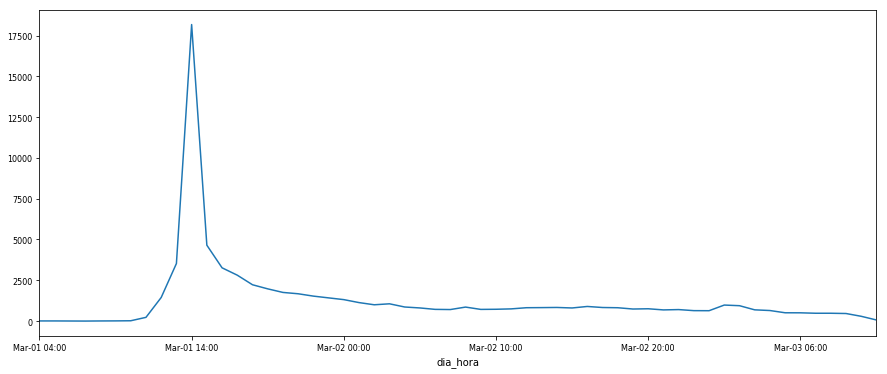

In [31]:
tweets["dia_hora"] = tweets.created_at.dt.strftime("%h-%d %H:00") #la columna "dia_hora" deberia alojar un string, objeto. 
gb = tweets.groupby(tweets.dia_hora)["dia_hora"].count() 
# Cada tweet tiene asociado un "dia_hora", asi que cuanto contamos cuantos valores unicos de "dia_hora"
# Obtenemos el nro de tweets por hora, aquí Pablo Celayes lo llama  "Volumen de tuits por hora"
# Se puede entender como la densidad de tuits por hora, cuantos tweets por hora hay. 
gb.plot(figsize=(15,6), fontsize=8)

# Tuits más retuiteados

In [32]:
idx = tweets.groupby(['original_id'])['retweet_count'].transform(max) == tweets['retweet_count'] #Este objecto es una serie booleana.
tweets[idx][['original_id', 'full_text', 'favorite_count', 'retweet_count']].sort_values(by='retweet_count', ascending=False).head(10)

,original_id,full_text,favorite_count,retweet_count
104991,1098049251836391424,charlotte caniggia que se limpia el orto con dólares se dio cuenta y vos que pagas la luz en cuotas no https://t.co/WykH3ezo9g,58684,20224
189501,1039476200811446274,Hilo de frases de Macri que se pueden usar para cortar una relación:,40493,15900
2034,1100728869445922816,"¿Cómo es posible que los socios de Sánchez, los de Podemos, vengan al Congreso con camisetas de “Yo con Maduro”? ¿Es que no tienen corazón? ¿No ven cómo está masacrando Maduro al pueblo venezolano? Yo estoy con Venezuela, la democracia y la libertad 🇻🇪👇🏻 https://t.co/bocqWJR3jG",21362,13861
160102,973190348435533824,padres hace 10 años: TENÉ CUIDADO CON QUIEN CHATEÁS NO CREAS TODO LO QUE TE DICE LA INTERNET padres hoy: y viste que en realidad macri y cristina son amantes lo leí ayer jaja,43193,11595
194843,1068648026389004289,"Macri se emocionó. Yo también. Ésta imagen no se borrará más de los ojos de los argentinos de bien. El mundo entero gritando: ""Argentina, Argentina"", en el Teatro Colón. Si se lo perdieron, vean ésto por favor. Gracias Argentina 🇦🇷👇 https://t.co/KUyFKnszOn",31293,10042
191839,598170504831307776,3 de junio. Plaza Congreso. Basta de femicidios. #NiUnaMenos http://t.co/zQSz1ti3C7,4870,9045
147745,1036069043520909314,"#URGENTE Macri echa a Lopetegui y Quintana, hombres de Marcos Peña, y también elimina ministerios: Ciencia y Tecnología, Cultura, Energía, Agroindustria, Salud, Turismo, Ambiente, Trabajo y Modernización. Un desguace del Estado nunca antes visto. Lamentable por donde se lo mire.",11010,8688
190238,1069407274043621376,"Gente, agradecería si me ayudan a compartir esta investigación que hicimos en @eldestapeweb y que debería ser un escándalo nacional. El hermano de Macri recibió USD5.000.000 de la sospechosa empresa que ganó 6 parques eólicos revelado por @Emiliadelfino https://t.co/aEX8QFiFJW",6345,8273
218222,1092942954384236544,si ustedes votaron al pelotudo de macri por qué yo no puedo votar al más pijudo https://t.co/eudzh1PmP4,26059,7874
107592,1035280236320120837,"No fue solo Macri. Hay otros responsables del hambre del pueblo: Lanata, Leuco, Majul, Del Moro y tantos que llenaron al pueblo de odio, hablando solo de Cristina y escondiendo el saqueo. Los hicieron votar a su victimario. Ahora quieren abrirse. son despreciables",12977,7535


# Tuits más faveados

In [33]:
# TODO: evitar duplicados (por ej: el 9 y el 10)
# Aplicar misma solución a más retuiteados
tweets.loc[tweets.text.duplicated(keep="first"),:];

In [34]:
tweets.drop_duplicates(subset=['text'],keep="first",inplace=True)

In [35]:
final_entries=len(tweets)
final_entries

71443

In [36]:
removed_entries=abs(final_entries-initial_entries)
print("From the original DataFrame were removed: {}".format(removed_entries))

From the original DataFrame were removed: 152530


In [37]:
idx = tweets.groupby(['original_id'])['favorite_count'].transform(max) == tweets['favorite_count']
tweets[idx][['original_id', 'full_text', 'favorite_count', 'retweet_count']].sort_values(by='favorite_count', ascending=False).head(10)

,original_id,full_text,favorite_count,retweet_count
104991,1098049251836391424,charlotte caniggia que se limpia el orto con dólares se dio cuenta y vos que pagas la luz en cuotas no https://t.co/WykH3ezo9g,58684,20224
160102,973190348435533824,padres hace 10 años: TENÉ CUIDADO CON QUIEN CHATEÁS NO CREAS TODO LO QUE TE DICE LA INTERNET padres hoy: y viste que en realidad macri y cristina son amantes lo leí ayer jaja,43193,11595
189501,1039476200811446274,Hilo de frases de Macri que se pueden usar para cortar una relación:,40493,15900
194843,1068648026389004289,"Macri se emocionó. Yo también. Ésta imagen no se borrará más de los ojos de los argentinos de bien. El mundo entero gritando: ""Argentina, Argentina"", en el Teatro Colón. Si se lo perdieron, vean ésto por favor. Gracias Argentina 🇦🇷👇 https://t.co/KUyFKnszOn",31293,10042
218222,1092942954384236544,si ustedes votaron al pelotudo de macri por qué yo no puedo votar al más pijudo https://t.co/eudzh1PmP4,26059,7874
2034,1100728869445922816,"¿Cómo es posible que los socios de Sánchez, los de Podemos, vengan al Congreso con camisetas de “Yo con Maduro”? ¿Es que no tienen corazón? ¿No ven cómo está masacrando Maduro al pueblo venezolano? Yo estoy con Venezuela, la democracia y la libertad 🇻🇪👇🏻 https://t.co/bocqWJR3jG",21362,13861
110072,1085195644367589376,"Ayer en Jujuy, un paso más en la brutal persecución que sufre Milagro Sala, con una condena a medida de Macri y Gerardo Morales. #ArgentinaSinEstadoDeDerecho https://t.co/BgnQVu16po",14065,6955
1596,1100697116308135937,Albert Rivera en este momento diciendo en el Congreso que ha sido un error subir el salario mínimo a 900€. Cómo se nota a qué clase social representa Ciudadanos. Mucha banderita y odio pero luego es lo de siempre: políticas contra las familias trabajadoras.,13181,7129
107592,1035280236320120837,"No fue solo Macri. Hay otros responsables del hambre del pueblo: Lanata, Leuco, Majul, Del Moro y tantos que llenaron al pueblo de odio, hablando solo de Cristina y escondiendo el saqueo. Los hicieron votar a su victimario. Ahora quieren abrirse. son despreciables",12977,7535
202053,1097999667546284032,"Gracias a Urtubey, Cristina Kirchner, Sergio Massa y a todo el Peronismo por recordarnos lo que son. Hoy se unieron para voltear el DNU de #ExtinciónDeDominio. Esto no es en contra de Macri, lo hacen en contra de la gente. Lo que se robaron durante décadas es lo que nos falta.",12522,7200


# Nube de palabras

In [12]:
import gensim
import re

def clean(s):
    s = gensim.utils.deaccent(s)
    s = s.strip().lower()
    s = s.replace("rt ", " ")

    # remove mentions
    s = re.sub(r"@\w+", " ", s)

    # remove URLs
    s = re.sub(r"https?://t\.co/\w+", " ", s)
    s = re.sub(
        r"https?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
        " ", s)
    s = re.sub(r",", " ", s)
    s = re.sub(r"[^A-Za-z0-9ñ()\'\`#]", " ", s)
    s = re.sub(r"\(", " \( ", s)
    s = re.sub(r"\)", " \) ", s)
    s = re.sub(r"\?", " \? ", s)
    s = re.sub(r"\s{2,}", " ", s)

    return s

In [13]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

def tokenize(s):
    return [t for t in s.strip().split() if (t not in stopwords.words('spanish')
                                             and len(t) > 1
                                             and t[0] != '#'
                                             and t != "si")]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\causa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def get_all_tokens(tweets):
    all_tokens = []
    for tuit in tweets.text.apply(clean).unique():
        all_tokens += tokenize(tuit) + ['.']
    return all_tokens

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
all_tokens = get_all_tokens(tweets.sample(5000))

(-0.5, 799.5, 399.5, -0.5)

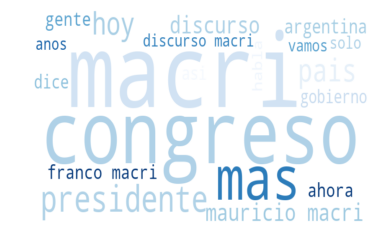

In [17]:
wordcloud = WordCloud(normalize_plurals=False, colormap='Blues', max_words=20, width=800, height=400,
                      min_font_size=12, background_color='white').generate(' '.join(all_tokens))

plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")

# Top hashtags por volumen de tuits

In [18]:
from collections import Counter

In [19]:
ht_counts = Counter()

In [20]:
for hts in tweets[~tweets.hts.isna()].hts.values:
    for ht in hts.split():
        ht_counts[ht] += 1

In [21]:
top10_hts = ht_counts.most_common(10)

<BarContainer object of 10 artists>

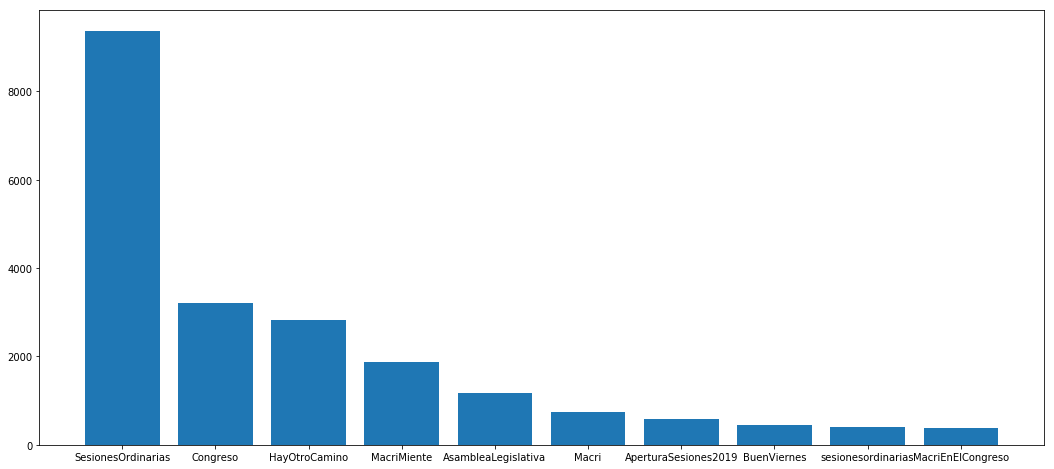

In [22]:
fig, ax = plt.subplots(figsize=(18,8))
plt.bar(*zip(*top10_hts))

In [77]:
# TODO: arreglar tamaño de figura para que se lean los hashtags

In [23]:
top10_hts

[('SesionesOrdinarias', 9378),
 ('Congreso', 3213),
 ('HayOtroCamino', 2825),
 ('MacriMiente', 1866),
 ('AsambleaLegislativa', 1175),
 ('Macri', 740),
 ('AperturaSesiones2019', 575),
 ('BuenViernes', 451),
 ('sesionesordinarias', 402),
 ('MacriEnElCongreso', 391)]

# Volumen hashtag por hora

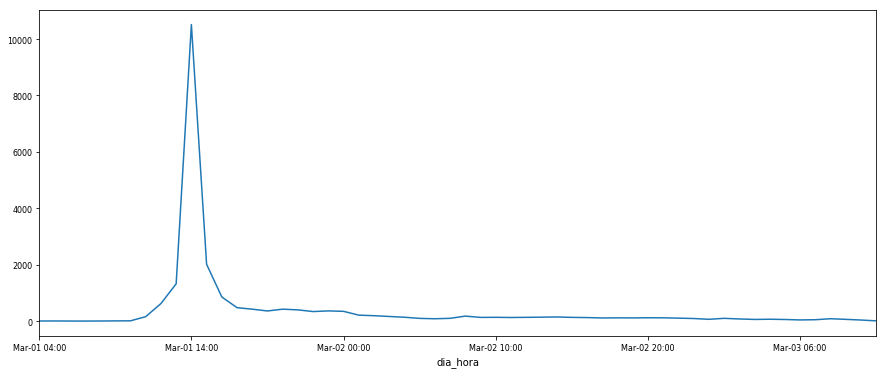

In [28]:
hts_hora = tweets.groupby(tweets.dia_hora)["hts"].count()
hts_hora.plot(figsize=(15,6), fontsize=8)